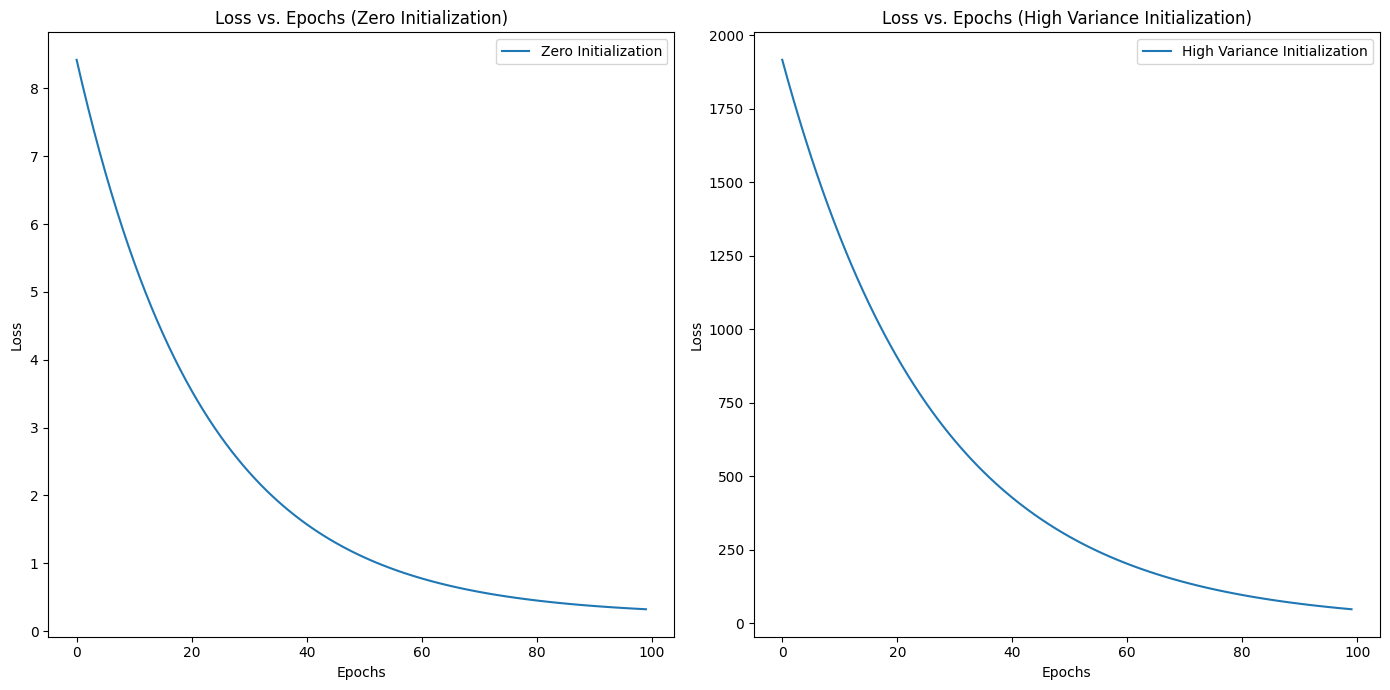

In [1]:
# Cheney Zhang Homework #1 Question #4

import numpy as np
import matplotlib.pyplot as plt

# Set up a simple example with a neural network function
def simple_neural_network(x, weights):
    return x.dot(weights)

# Sata for input (x) and output (y)
np.random.seed(0)
x = np.random.randn(100, 3)
true_weights = np.array([1.5, -2.0, 1.0])
y = simple_neural_network(x, true_weights) + np.random.randn(100) * 0.5

# Training function
def train_network(initial_weights, epochs=100):
    weights = initial_weights.copy()
    learning_rate = 0.01
    losses = []

    for epoch in range(epochs):
        predictions = simple_neural_network(x, weights)
        error = predictions - y
        loss = np.mean(error ** 2)
        losses.append(loss)

        # Gradient descent
        gradients = 2 * x.T.dot(error) / len(y)
        weights -= learning_rate * gradients

    return losses

# Initialize weights to zero and with a high-variance normal distribution
weights_zero = np.zeros(x.shape[1])
weights_high_variance = np.random.normal(0, np.sqrt(1000), size=x.shape[1])

# Train the network
losses_zero = train_network(weights_zero)
losses_high_variance = train_network(weights_high_variance)

# Plot the training losses
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(losses_zero, label='Zero Initialization')
plt.title('Loss vs. Epochs (Zero Initialization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(losses_high_variance, label='High Variance Initialization')
plt.title('Loss vs. Epochs (High Variance Initialization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()